# Classification of News Articles 

It is a notebook for multiclass classification of News articles which are having classes numbered 1 to 4, where 
>1 is "World News" <br>
>2 is "Sports News" <br>
>3 is "Business News" <br>
>4 is "Science-Technology News"

I have used various models for classification of the News articles. The classification algorithms used are:-

1. Multinomial Naive Bayes
2. Decision Tree 
3. Gaussian Naive Bayes
4. Stochastic Gradient Descent Classifier
5. LGBM (light gradient boosting machine) Classifier


### Importing libraries

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement wordcloud (from versions: none)
ERROR: No matching distribution found for wordcloud


In [1]:
import numpy as np 
import pandas as pd 
import nltk
import string as s
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

In [2]:
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.metrics import  confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier

In [3]:
train_data=pd.read_csv("train.csv",header=0,names=['classid','title','desc'])
test_data=pd.read_csv("test.csv",header=0,names=['classid','title','desc'])

In [10]:
train_data.head()

,classid,title,desc
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [18]:
test_data.head()

,classid,title,desc
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


## Splitting Data into Input and Label 

In [4]:
train_x=train_data.desc[:70000]
test_x=test_data.desc
train_y=train_data.classid[:70000] 
test_y=test_data.classid

C:\Users\Rushi Computers\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


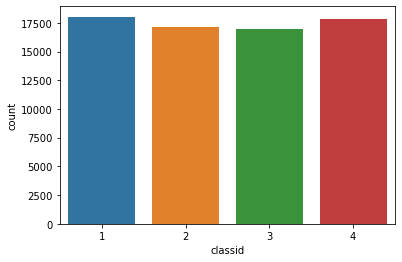

In [5]:
df=train_data[:70000]
sns.countplot(df.classid);

## WordCloud of News Articles of Different Types

In [6]:
from PIL import Image
c_mask = np.array(Image.open("comment.png"))
u_mask = np.array(Image.open("upvote.png"))
c_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [7]:
stopwordset= set(STOPWORDS)
morestop={'lt','gt','href','HREF','quot','aspx'}
stopwordset= stopwordset.union(morestop)

### World News

In [8]:
world = df.desc[df.classid[df.classid==1].index]

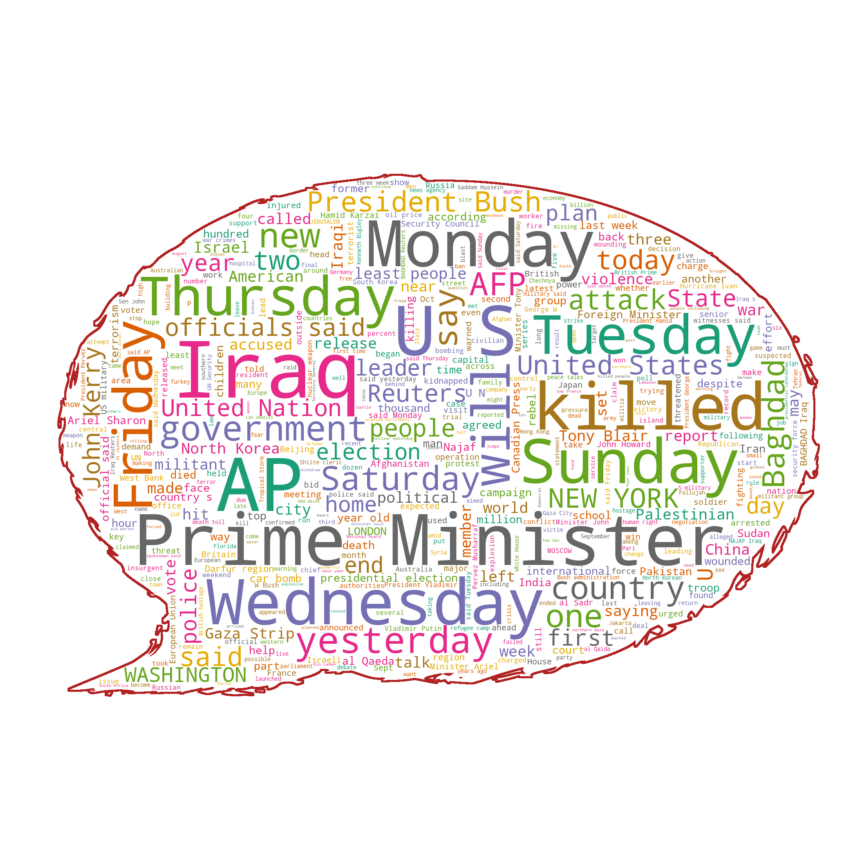

In [25]:
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 500 ,background_color="white",contour_width=3, contour_color='firebrick',mask=c_mask, stopwords=stopwordset,colormap='Dark2').generate(" ".join(world))
plt.imshow(wordcloud,interpolation = 'bilinear');
plt.axis("off");

### Sports News

In [9]:
sports = df.desc[df.classid[df.classid==2].index]

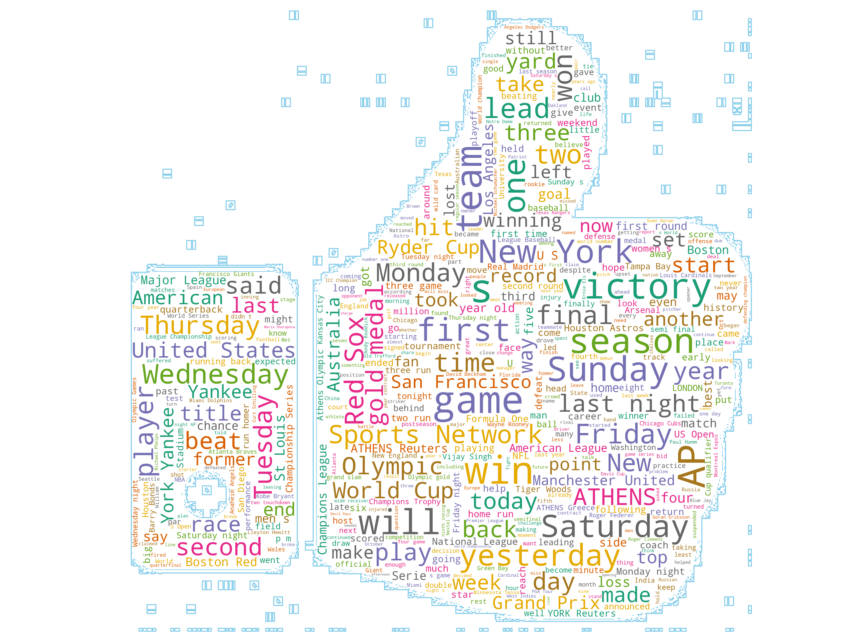

In [27]:
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 500 ,background_color="white",contour_width=3, contour_color='skyblue',mask=u_mask, stopwords=stopwordset,colormap='Dark2').generate(" ".join(sports))
plt.imshow(wordcloud,interpolation = 'bilinear');
plt.axis("off");

### Business News

In [10]:
biz = df.desc[df.classid[df.classid==3].index]

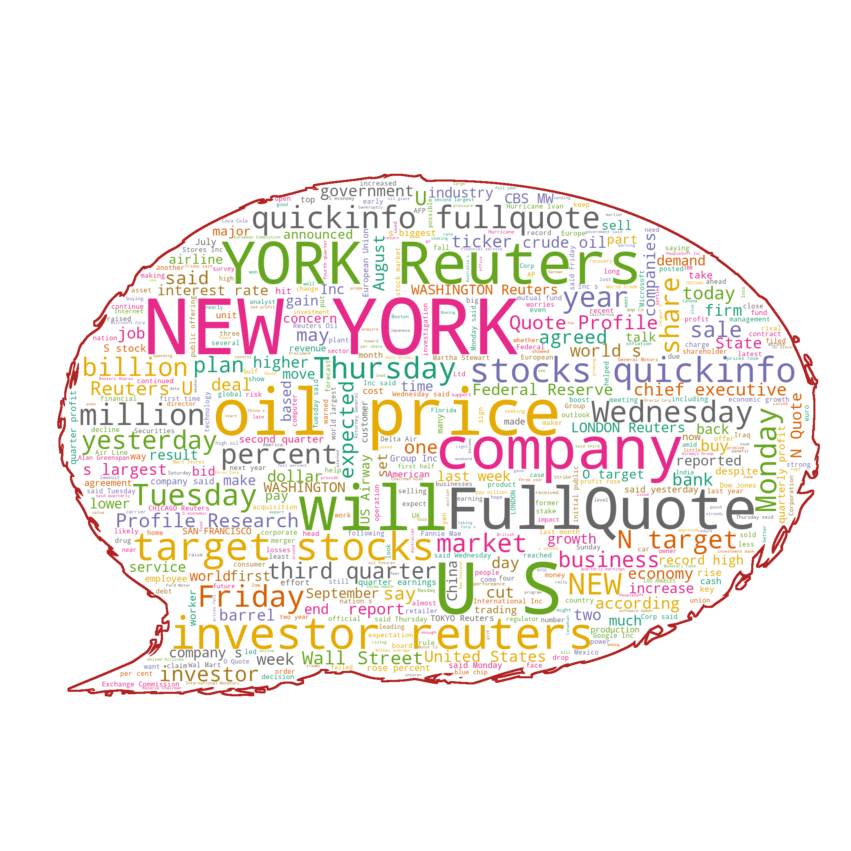

In [29]:
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 500 ,background_color="white",contour_width=3, contour_color='firebrick',mask=c_mask, stopwords=stopwordset,colormap='Dark2').generate(" ".join(biz))
plt.imshow(wordcloud,interpolation = 'bilinear');
plt.axis("off");

### Science and Technology News

In [11]:
sci = df.desc[df.classid[df.classid==4].index]

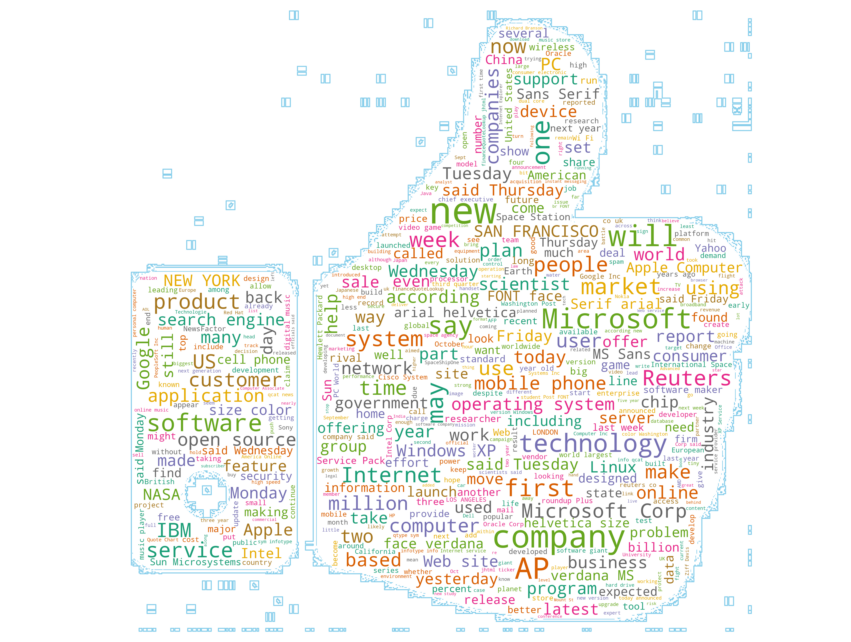

In [16]:
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 500 ,background_color="white",contour_width=3, contour_color='skyblue',mask=u_mask, stopwords=stopwordset,colormap='Dark2').generate(" ".join(sci))
plt.imshow(wordcloud,interpolation = 'bilinear');
plt.axis("off");

# Preprocessing of Data

The data is preprocessed, in NLP it is also known as text normalization. Some of the most common methods of text normalization are 
* Tokenization
* Lemmatization
* Stemming


## Removal of URLs

In [12]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

train_x=train_x.apply(remove_urls)
test_x=test_x.apply(remove_urls)

## Removal of HTML tags

In [13]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

train_x=train_x.apply(remove_html)
test_x=test_x.apply(remove_html)

## Tokenization of Data

In [14]:
def word_tokenize(txt):
    tokens = re.findall("[\w']+", txt)
    return tokens
train_x=train_x.apply(word_tokenize)
test_x=test_x.apply(word_tokenize)

## Conversion of Data to Lowercase

In [15]:
def lowercasing(lst):
    new_lst=[]
    for  i in  lst:
        i=i.lower()
        new_lst.append(i) 
    return new_lst
train_x=train_x.apply(lowercasing)
test_x=test_x.apply(lowercasing)

## Removal of Stopwords

In [16]:
def remove_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

train_x=train_x.apply(remove_stopwords)
test_x=test_x.apply(remove_stopwords)  

## Removal of Punctuation Symbols

In [17]:
def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for  j in  s.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(remove_punctuations) 
test_x=test_x.apply(remove_punctuations)

## Removal of Numbers(digits)

In [18]:
def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]

    for i in  lst:
        for j in  s.digits:
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in  nodig_lst:
        if  i!='':
            new_lst.append(i)
    return new_lst
train_x=train_x.apply(remove_numbers)
test_x=test_x.apply(remove_numbers)

## Stemming of Data

In [19]:
import nltk

def stemming(text):
    porter_stemmer = nltk.PorterStemmer()
    roots = [porter_stemmer.stem(each) for each in text]
    return (roots)

train_x=train_x.apply(stemming)
test_x=test_x.apply(stemming)

## Lemmatization of Data

In [41]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Rushi
[nltk_data]     Computers\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

In [20]:
lemmatizer=nltk.stem.WordNetLemmatizer()
def lemmatzation(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(lemmatzation)
test_x=test_x.apply(lemmatzation)

In [21]:
def remove_extrawords(lst):
    stop=['href','lt','gt','ii','iii','ie','quot','com']
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

train_x=train_x.apply(remove_extrawords)
test_x=test_x.apply(remove_extrawords)

In [22]:
train_x=train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x=test_x.apply(lambda x: ''.join(i+' '  for i in x))

## Feature Extraction
 
 Features are extracted from the dataset and TF-IDF(Term Frequency - Inverse Document Frequency) is used for this purpose.

In [23]:
tfidf=TfidfVectorizer(min_df=3)
train_1=tfidf.fit_transform(train_x)
test_1=tfidf.transform(test_x)
print("No. of features extracted")
print(len(tfidf.get_feature_names()))


train_arr=train_1.toarray()
test_arr=test_1.toarray()

No. of features extracted
16454


C:\Users\Rushi Computers\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Training of Model

### Model 1- Multinomial Naive Bayes

In [24]:
NB_MN=MultinomialNB(alpha=0.16)
NB_MN.fit(train_arr,train_y)
pred=NB_MN.predict(test_arr)

print("first 20 actual labels")
print(test_y.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

first 20 actual labels
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
first 20 predicted labels
[3, 4, 4, 2, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3]


### Evaluation of Results

**Function for evaluation of model**

This function finds the F1-score and Accuracy of the trained model

In [25]:
def eval_model(y,y_pred):
    print("F1 score of the model")
    print(f1_score(y,y_pred,average='micro'))
    print("Accuracy of the model")
    print(accuracy_score(y,y_pred))
    print("Accuracy of the model in percentage")
    print(round(accuracy_score(y,y_pred)*100,3),"%")

**Function for Displaying the Confusion Matrix**

This function displays the confusion matrix of the model

In [26]:
def confusion_mat(color):
    cof=confusion_matrix(test_y, pred)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");
    

In [27]:
eval_model(test_y,pred)
    
a=round(accuracy_score(test_y,pred)*100,3)

F1 score of the model
0.8867105263157894
Accuracy of the model
0.8867105263157895
Accuracy of the model in percentage
88.671 %


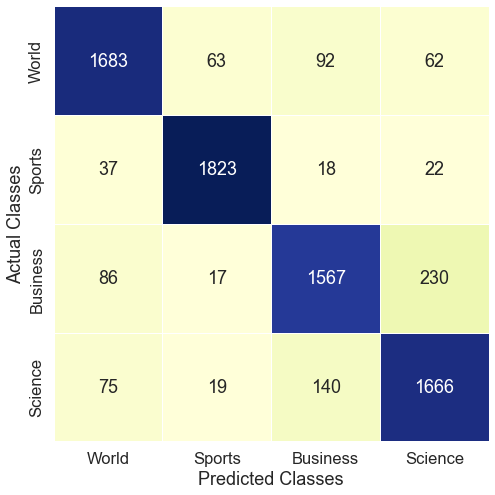

In [50]:
confusion_mat('YlGnBu')

### Model 2 - Decision Tree Classifier

In [28]:
DT=DecisionTreeClassifier()
DT.fit(train_arr,train_y)
pred=DT.predict(test_arr)

print("first 20 actual labels")
print(test_y.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

KeyboardInterrupt: 

### Evaluation of Results

In [35]:
eval_model(test_y,pred)
    
b=round(accuracy_score(test_y,pred)*100,3)


F1 score of the model
0.7836842105263156
Accuracy of the model
0.7836842105263158
Accuracy of the model in percentage
78.368 %


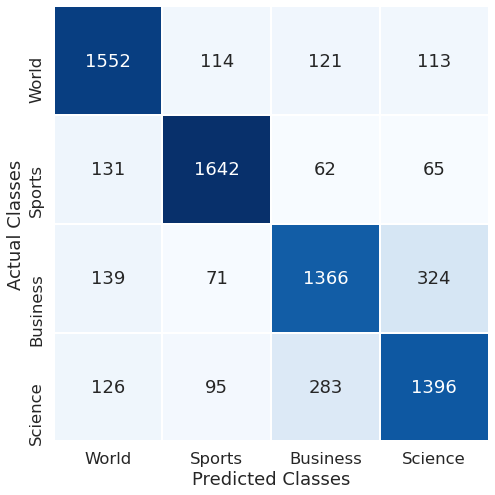

In [36]:
confusion_mat('Blues')

### Model 3 - Gaussian Naive Bayes

In [ ]:
NB=GaussianNB(var_smoothing=0.1)
NB.fit(train_arr,train_y)
pred=NB.predict(test_arr)

### Evaluation of Results

In [38]:
eval_model(test_y,pred)
    
c=round(accuracy_score(test_y,pred)*100,3)

F1 score of the model
0.8752631578947369
Accuracy of the model
0.8752631578947369
Accuracy of the model in percentage
87.526 %


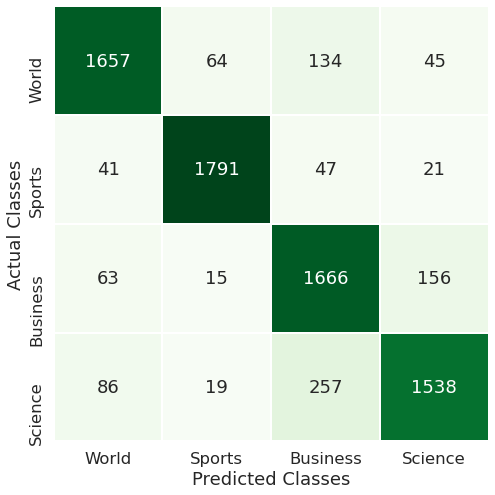

In [39]:
confusion_mat('Greens')

### Model 4 - Stochastic Gradient Descent Classifier

In [40]:
SGD=SGDClassifier(early_stopping=True,penalty='l2',alpha=0.00001)
SGD.fit(train_arr,train_y)
pred=SGD.predict(test_arr)

### Evaluation of Model

In [41]:
eval_model(test_y,pred)
    
d=round(accuracy_score(test_y,pred)*100,3)

F1 score of the model
0.8921052631578947
Accuracy of the model
0.8921052631578947
Accuracy of the model in percentage
89.211 %


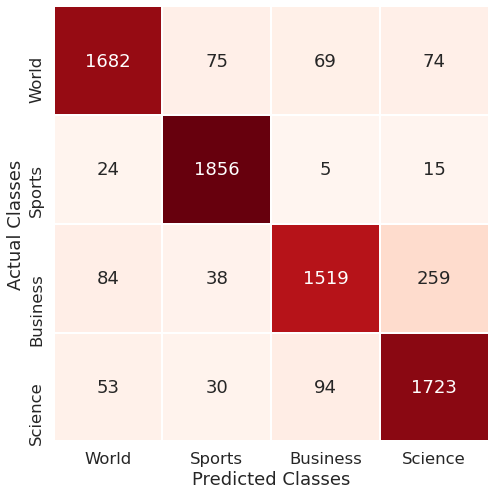

In [42]:
confusion_mat('Reds')

### Model 5 - Light Gradient Boosting Classifier

In [43]:
lgbm=LGBMClassifier(learning_rate=0.35)
lgbm.fit(train_arr,train_y)
pred=lgbm.predict(test_arr)

### Evaluation of Model

In [44]:
eval_model(test_y,pred)

e=round(accuracy_score(test_y,pred)*100,3)

F1 score of the model
0.8880263157894738
Accuracy of the model
0.8880263157894737
Accuracy of the model in percentage
88.803 %


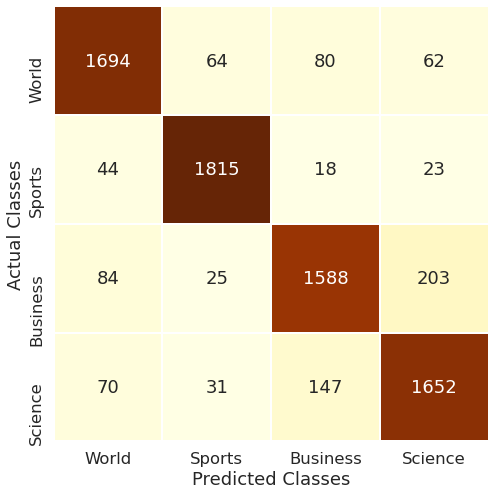

In [45]:
confusion_mat('YlOrBr')

## Comparison of Accuracies of Different Models

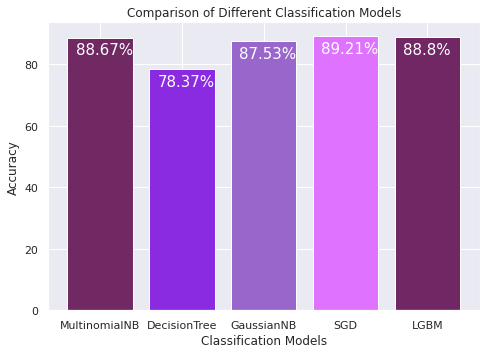

In [46]:
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['MultinomialNB', 'DecisionTree', 'GaussianNB', 'SGD','LGBM']
Accuracy=[a,b,c,d,e]
ax.bar(Models,Accuracy,color=['#702963','#8a2be2','#9966cc','#df73ff','#702763']);
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-5.5, str(round(i.get_height(),2))+'%', fontsize=15, color='white')
plt.title('Comparison of Different Classification Models');
plt.ylabel('Accuracy');
plt.xlabel('Classification Models');

plt.show();